# London record temperatures
### How London's weather is becoming more volatile
##### Huw Hallam


<br>This data visualisation explores how London's weather is changing. I calculate, for each calendar day, the outer range of air temperatures - highest highs and lowest lows - recorded in London during the decade from 2014-2023. I then show how frequently the temperatures recorded for 2024 exceed these outer bounds. 

#### Source data
##### NOAA National Centers for Environmental Information
Daily summaries for London, UK, accessed from Climate Data Online. https://www.ncdc.noaa.gov/cdo-web/search

<br>© Huw Hallam, 2025

In [2]:
import pandas as pd
df = pd.read_csv('NOAA - London weather 2014-24.csv')

#remove unnecessary columns
df = df[['DATE', 'TMAX', 'TMIN']]

#converte 'DATE' to datetime
df['DATE'] = pd.to_datetime(df['DATE'])

#drop the 29 February
df = df.loc[df['DATE'].dt.strftime('%m-%d') != '02-29']

In [3]:
# Create subsets of minimum and maximum temperatures for the period 2014-2023, grouped by day of year
mins_14_23 = df.loc[df['DATE'] < '2024-01-01'].groupby(df['DATE'].dt.strftime('%m-%d'))['TMIN'].min()
maxs_14_23 = df.loc[df['DATE'] < '2024-01-01'].groupby(df['DATE'].dt.strftime('%m-%d'))['TMAX'].max()
avg_lows_14_23 = df.loc[df['DATE'] < '2024-01-01'].groupby(df['DATE'].dt.strftime('%m-%d'))['TMIN'].mean()
avg_highs_14_23 = df.loc[df['DATE'] < '2024-01-01'].groupby(df['DATE'].dt.strftime('%m-%d'))['TMAX'].mean()

# Create subset of mins and maxs for 2024 data grouped by day of year
mins_2024 = df.loc[df['DATE'] >= '2024-01-01'].groupby(df['DATE'].dt.strftime('%m-%d'))['TMIN'].min()
maxs_2024 = df.loc[df['DATE'] >= '2024-01-01'].groupby(df['DATE'].dt.strftime('%m-%d'))['TMAX'].max()

# Create collection of 2024 datapoints that exceed previous decades maxima and minima
records = mins_2024.loc[mins_2024 < mins_14_23]
records = pd.concat([records, maxs_2024.loc[maxs_2024 > maxs_14_23]])

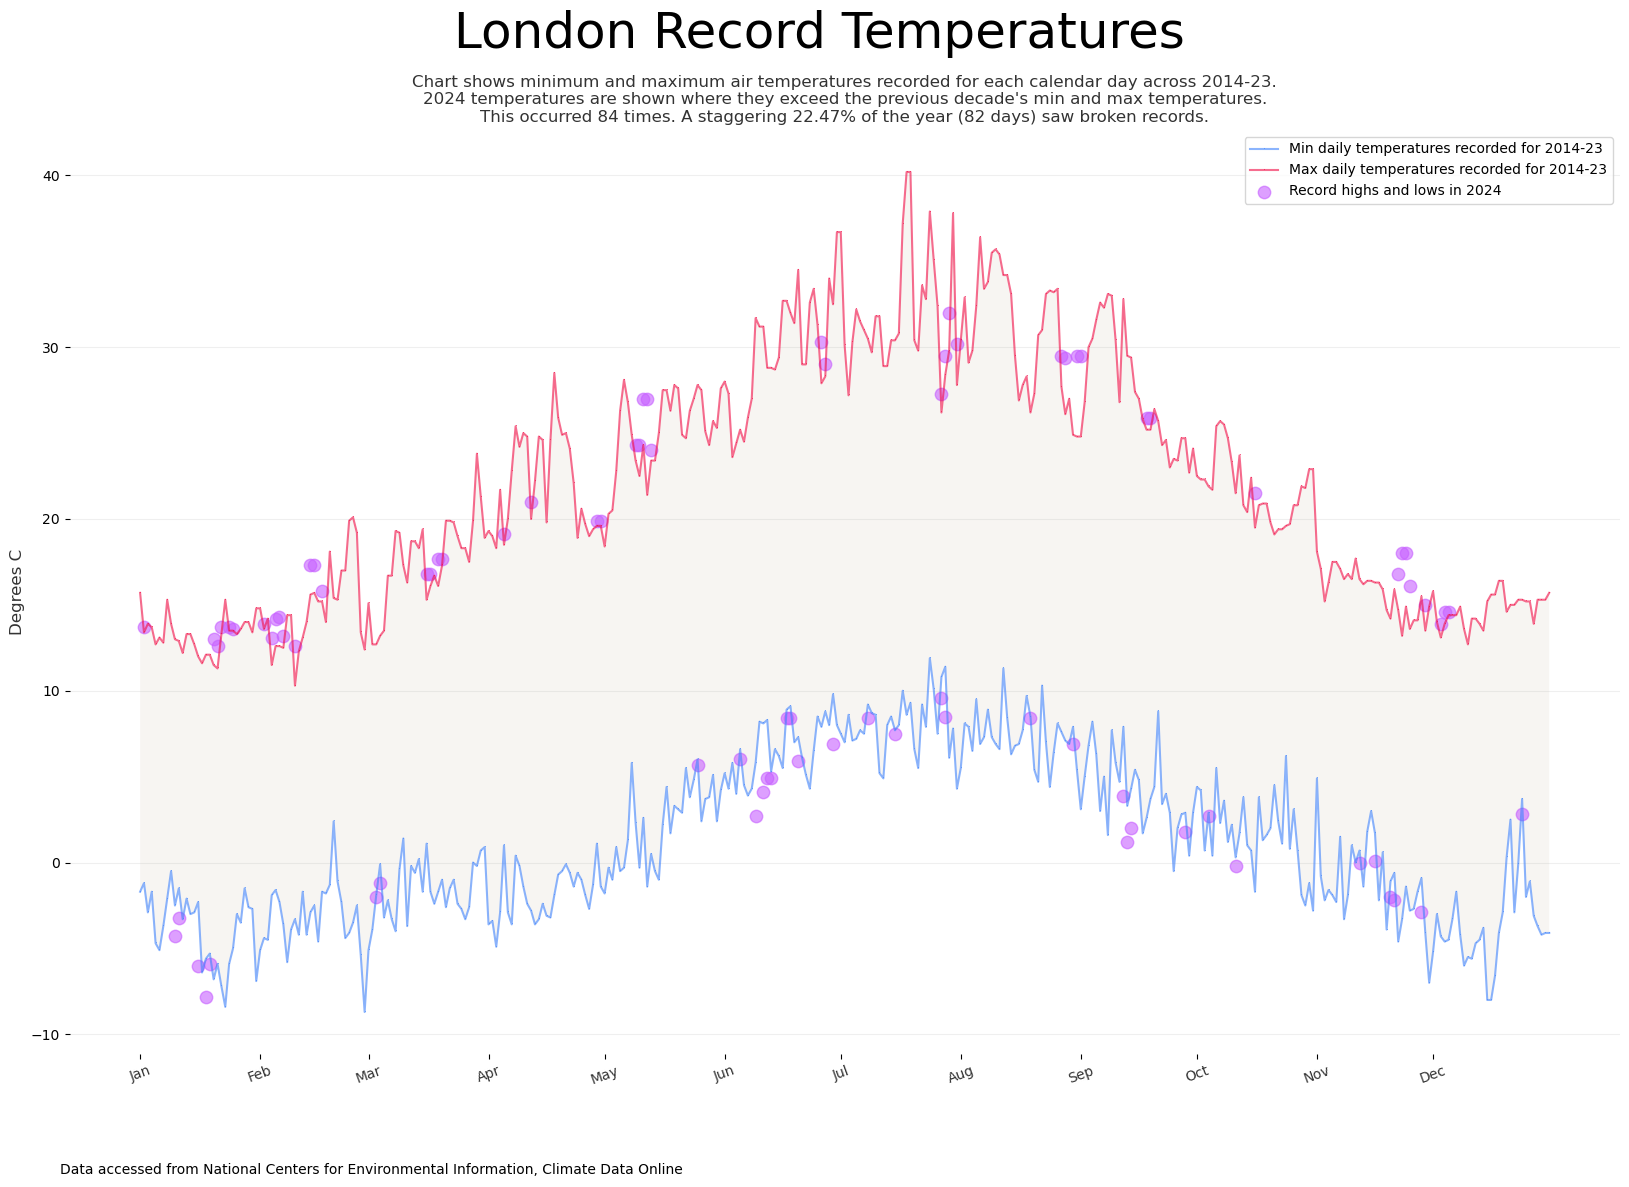

In [4]:
import matplotlib.pyplot as plt
from calendar import month_abbr

plt.figure(figsize=(20, 12))#, facecolor='xkcd:dark grey');

plt.ylabel('Degrees C', alpha=0.8, fontsize=12)
#plt.xlabel('Year from January through December', alpha=0.8)
plt.suptitle('London Record Temperatures', fontsize=36)#, x=0.125, ha='left')
plt.title(f"Chart shows minimum and maximum air temperatures recorded for each calendar day across 2014-23.\n2024 temperatures are shown where they exceed the previous decade's min and max temperatures.\nThis occurred {records.size} times. A staggering {records.index.nunique()/365:.2%} of the year ({records.index.nunique()} days) saw broken records.", alpha=0.8, fontsize=12)#, loc='left')

plt.plot(mins_14_23, '-,', color='xkcd:dodger blue', alpha=0.6)
plt.plot(maxs_14_23, '-,', color='xkcd:pinkish red', alpha=0.6)
#plt.plot(avg_lows_14_23, '--', color='xkcd:dodger blue', alpha=0.4)
#plt.plot(avg_highs_14_23, '--', color='xkcd:pinkish red', alpha=0.4)

ticks = pd.DataFrame([i, month_abbr[int(x[:2])]] for i, x in enumerate(mins_14_23.index))
ticks.columns=['index', 'month']
ticks_grouped = ticks.groupby('month').first()
plt.xticks(ticks_grouped['index'], ticks_grouped.index, rotation=20, alpha=0.8)

ax = plt.gca()
#ax.set_facecolor('xkcd:dark grey')
ax.fill_between(range(len(mins_14_23)), 
                       mins_14_23, maxs_14_23, 
                       facecolor='xkcd:mushroom', 
                       alpha=0.1,
                       label='_nolegend_');

plt.scatter(records.index, records, s=80, c='xkcd:bright lavender', marker='o', alpha=0.6)
plt.legend(['Min daily temperatures recorded for 2014-23', 'Max daily temperatures recorded for 2014-23', 'Record highs and lows in 2024'], loc='best')
plt.grid(axis = 'y', alpha=0.2)

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.figtext(0.12, 0.01, "Data accessed from National Centers for Environmental Information, Climate Data Online");
#plt.savefig('London record air temperatures.png', bbox_inches='tight')